## Plotting the Frequency change over time between the CON1 and ARI

In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)
quiet_library(ggrepel)
options(warn = -1)



In [2]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [3]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")

cluster_colors_ext <- colorRampPalette(cluster_colors)(75)
options(repr.plot.width = 20, repr.plot.height = 15)

In [4]:
# Loading the aim 1 DEG results file
degs_a1=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/certpro_Zi_files/ALTRA_scRNA_AIFI_L3_Pseudobulk_certPro_AIM1_BMI_deg_results.csv")
degs_a1%>%head(3)

,cell_type,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Adaptive NK cell,AAK1,44.80038,0.146387776,0.12186225,1.2012561,0.2296519,0.6852282,0.5630065,ns
2,Adaptive NK cell,ABCF1,25.40334,0.084321320,0.11284745,0.7472151,0.4549337,0.8511353,0.6973416,ns
3,Adaptive NK cell,ABHD17A,102.88741,0.008860484,0.06349922,0.1395369,0.8890259,0.9761770,0.7940845,ns


In [5]:
## renaming the cell_type column as "celltype" for easy downstream analysis
degs_a1=degs_a1%>%rename(celltype=cell_type)
degs_a1%>%head(2)

,celltype,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Adaptive NK cell,AAK1,44.80038,0.14638778,0.1218623,1.2012561,0.2296519,0.6852282,0.5630065,ns
2,Adaptive NK cell,ABCF1,25.40334,0.08432132,0.1128475,0.7472151,0.4549337,0.8511353,0.6973416,ns


In [6]:
##adding the direction column
degs_a1=degs_a1%>%
    filter(!is.na(padj) & !is.na(log2FoldChange)) %>% mutate(direction=if_else(log2FoldChange>0, 'up', 'down'))
degs_a1 %>% head(2)

,celltype,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,q_values,sig,direction
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Adaptive NK cell,AAK1,44.80038,0.14638778,0.1218623,1.2012561,0.2296519,0.6852282,0.5630065,ns,up
2,Adaptive NK cell,ABCF1,25.40334,0.08432132,0.1128475,0.7472151,0.4549337,0.8511353,0.6973416,ns,up


In [7]:
degs_a1$celltype%>%unique()%>%length
degs_a1$celltype%>%unique()

[1] 67

[1] "Adaptive NK cell"                    
 [2] "Adaptive NK cell_uk1_T"              
 [3] "C1Q+ CD16 monocyte"                  
 [4] "CD14+ cDC2"                          
 [5] "CD27+ effector B cell"               
 [6] "CD27- effector B cell"               
 [7] "CD4 MAIT"                            
 [8] "CD56bright NK cell"                  
 [9] "CD8 MAIT"                            
[10] "CD8aa"                               
[11] "CD95 memory B cell"                  
[12] "CM CD4 T cell"                       
[13] "CM CD4 T cell_uk1_CD8"               
[14] "CM CD4 T cell_uk2"                   
[15] "CM CD8 T cell"                       
[16] "CMP cell"                            
[17] "Core CD14 monocyte"                  
[18] "Core CD16 monocyte"                  
[19] "Core memory B cell"                  
[20] "Core naive B cell"                   
[21] "Core naive CD4 T cell"               
[22] "Core naive CD8 T cell"               
[23] "DN T cell"                           
[24] "Early memory B cell"                 
[25] "Erythrocyte"                         
[26] "GZMB+ Vd2 gdT"                       
[27] "GZMB- CD27+ EM CD4 T cell"           
[28] "GZMB- CD27+ EM CD4 T cell_uk1_CD8"   
[29] "GZMB- CD27- EM CD4 T cell"           
[30] "GZMB- CD27- EM CD4 T cell_uk1_CD8"   
[31] "GZMK+ CD27+ EM CD8 T cell"           
[32] "GZMK+ CD27+ EM CD8 T cell_uk1_gdt"   
[33] "GZMK+ CD56dim NK cell"               
[34] "GZMK+ Vd2 gdT"                       
[35] "GZMK- CD27+ EM CD8 T cell"           
[36] "GZMK- CD56dim NK cell"               
[37] "HLA-DRhi cDC2"                       
[38] "IL1B+ CD14 monocyte"                 
[39] "ISG+ CD14 monocyte"                  
[40] "ISG+ CD16 monocyte"                  
[41] "ISG+ CD56dim NK cell"                
[42] "ISG+ cDC2"                           
[43] "ISG+ memory CD4 T cell"              
[44] "ISG+ memory CD8 T cell"              
[45] "ISG+ naive B cell"                   
[46] "ISG+ naive CD4 T cell"               
[47] "Intermediate monocyte"               
[48] "KLRB1+ memory CD4 Treg"              
[49] "KLRF1+ GZMB+ CD27- EM CD8 T cell"    
[50] "KLRF1+ effector Vd1 gdT"             
[51] "KLRF1+GZMB+_CD27-_EM_CD8_uk3"        
[52] "KLRF1- GZMB+ CD27- EM CD8 T cell"    
[53] "KLRF1- GZMB+ CD27- memory CD4 T cell"
[54] "KLRF1- effector Vd1 gdT"             
[55] "Memory CD4 Treg"                     
[56] "Naive CD4 Treg"                      
[57] "Naive Vd1 gdT"                       
[58] "Plasma cell"                         
[59] "Platelet"                            
[60] "Proliferating NK cell"               
[61] "Proliferating T cell"                
[62] "SOX4+ naive CD4 T cell"              
[63] "SOX4+ naive CD8 T cell"              
[64] "Transitional B cell"                 
[65] "Type 2 polarized memory B cell"      
[66] "cDC1"                                
[67] "pDC"

In [8]:
# filtering the DEG's based on the standared set cutoff
deg_counts <- degs_a1 %>%dplyr::filter(abs(log2FoldChange) >= 0.1 & q_values<0.1) %>% 
  group_by(celltype, direction) %>%
  summarise(deg_counts = n())

deg_counts %>% head(3)

deg_counts%>%dim

`summarise()` has grouped output by 'celltype'. You can override using the
`.groups` argument.


celltype,direction,deg_counts
<chr>,<chr>,<int>
Adaptive NK cell,down,15
Adaptive NK cell,up,14
C1Q+ CD16 monocyte,down,10


[1] 119   3

In [9]:
# getting the absolute count of DEGs 
total_degs<- deg_counts %>% 
    group_by(celltype) %>% 
    summarize(total_degs_counts = sum(abs(deg_counts))) %>%
    arrange(desc(total_degs_counts))
total_degs%>%dim
total_degs%>%head()

[1] 63  2

celltype,total_degs_counts
<chr>,<int>
CM CD4 T cell,2393
Core naive CD4 T cell,2282
Core CD16 monocyte,2019
Core naive CD8 T cell,1713
GZMK+ CD27+ EM CD8 T cell,1478
Core naive B cell,1421


In [10]:
# Loading the DA results
frequency_a1=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/certpro_Zi_files/DA_results/ALTRA_scRNA_AIFI_L3_deepclean_certpro_AIM1_frequency_DA_results.csv")
frequency_a1%>%head(3)
frequency_a1%>%dim

,AIFI_L3_new,term,estimate,std.error,statistic,p.value,cell_type,p.value.adj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Intermediate monocyte,Status_Xsecat_risk,0.8433456,0.2063163,4.087634,0.0001132528,Intermediate monocyte,0.009060224
2,CM CD4 T cell,Status_Xsecat_risk,0.3046737,0.0983913,3.096551,0.0028026796,CM CD4 T cell,0.112107186
3,HLA-DRhi cDC2,Status_Xsecat_risk,0.3801467,0.1535190,2.476219,0.0156638157,HLA-DRhi cDC2,0.250621051


[1] 80  8

In [11]:
## renaming the cell_type column as "celltype" for easy downstream analysis
frequency_a1=frequency_a1%>%rename(celltype=cell_type)
frequency_a1%>%head(2)

,AIFI_L3_new,term,estimate,std.error,statistic,p.value,celltype,p.value.adj
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,Intermediate monocyte,Status_Xsecat_risk,0.8433456,0.2063163,4.087634,0.0001132528,Intermediate monocyte,0.009060224
2,CM CD4 T cell,Status_Xsecat_risk,0.3046737,0.0983913,3.096551,0.0028026796,CM CD4 T cell,0.112107186


In [12]:
# mering the DA and DEG results 
merged_df <- left_join(frequency_a1, total_degs, by = "celltype")
merged_df%>%head(3)
merged_df%>%dim

,AIFI_L3_new,term,estimate,std.error,statistic,p.value,celltype,p.value.adj,total_degs_counts
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>
1,Intermediate monocyte,Status_Xsecat_risk,0.8433456,0.2063163,4.087634,0.0001132528,Intermediate monocyte,0.009060224,100
2,CM CD4 T cell,Status_Xsecat_risk,0.3046737,0.0983913,3.096551,0.0028026796,CM CD4 T cell,0.112107186,2393
3,HLA-DRhi cDC2,Status_Xsecat_risk,0.3801467,0.1535190,2.476219,0.0156638157,HLA-DRhi cDC2,0.250621051,641


[1] 80  9

In [13]:
#Creating a new column "Total_DEGs" and fill 0 for NA values in total_degs_counts
merged_df <- merged_df %>% mutate(Total_DEGs = ifelse(is.na(total_degs_counts), 0, total_degs_counts))
merged_df%>%head(2)
merged_df %>%filter(is.na(Total_DEGs))%>%dim

,AIFI_L3_new,term,estimate,std.error,statistic,p.value,celltype,p.value.adj,total_degs_counts,Total_DEGs
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>
1,Intermediate monocyte,Status_Xsecat_risk,0.8433456,0.2063163,4.087634,0.0001132528,Intermediate monocyte,0.009060224,100,100
2,CM CD4 T cell,Status_Xsecat_risk,0.3046737,0.0983913,3.096551,0.0028026796,CM CD4 T cell,0.112107186,2393,2393


[1]  0 10

In [14]:
merged_df%>%dim

[1] 80 10

In [15]:
# Reading the IH color file
IH_color_df=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/Color_Annotation_and_Order_FINAL 1.csv")
IH_color_df <- IH_color_df %>% rename(celltype = label)
IH_color_df%>%head(3)

,xpos,celltype,color
,<int>,<chr>,<chr>
1,1,SOX4+ naive CD4 T cell,#2B5777
2,2,Core naive CD4 T cell,#597FC6
3,3,ISG+ naive CD4 T cell,#072E77


In [16]:
# merging it with the merged df of DA and DEG results
merged_df<- left_join(merged_df, IH_color_df, by = "celltype")
merged_df%>%head(3)
merged_df%>%dim

,AIFI_L3_new,term,estimate,std.error,statistic,p.value,celltype,p.value.adj,total_degs_counts,Total_DEGs,xpos,color
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>
1,Intermediate monocyte,Status_Xsecat_risk,0.8433456,0.2063163,4.087634,0.0001132528,Intermediate monocyte,0.009060224,100,100,56,#B75228
2,CM CD4 T cell,Status_Xsecat_risk,0.3046737,0.0983913,3.096551,0.0028026796,CM CD4 T cell,0.112107186,2393,2393,4,#6793A4
3,HLA-DRhi cDC2,Status_Xsecat_risk,0.3801467,0.1535190,2.476219,0.0156638157,HLA-DRhi cDC2,0.250621051,641,641,61,#BE6E23


[1] 80 12

In [17]:
# common column to combine the deg and DA results 
merged_df <- merged_df %>%
  mutate(adjP_degs_combined_value = -log10(p.value.adj) * Total_DEGs)
merged_df%>%head(3)
merged_df%>%dim

,AIFI_L3_new,term,estimate,std.error,statistic,p.value,celltype,p.value.adj,total_degs_counts,Total_DEGs,xpos,color,adjP_degs_combined_value
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>
1,Intermediate monocyte,Status_Xsecat_risk,0.8433456,0.2063163,4.087634,0.0001132528,Intermediate monocyte,0.009060224,100,100,56,#B75228,204.2861
2,CM CD4 T cell,Status_Xsecat_risk,0.3046737,0.0983913,3.096551,0.0028026796,CM CD4 T cell,0.112107186,2393,2393,4,#6793A4,2274.2272
3,HLA-DRhi cDC2,Status_Xsecat_risk,0.3801467,0.1535190,2.476219,0.0156638157,HLA-DRhi cDC2,0.250621051,641,641,61,#BE6E23,385.2298


[1] 80 13

In [18]:
# to display the name of only signifcant celltype names in the plot 
merged_df <- merged_df %>%
  mutate(sig_L3 = if_else(adjP_degs_combined_value > 1, celltype, NA_character_))
merged_df%>%head(3)

,AIFI_L3_new,term,estimate,std.error,statistic,p.value,celltype,p.value.adj,total_degs_counts,Total_DEGs,xpos,color,adjP_degs_combined_value,sig_L3
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<chr>
1,Intermediate monocyte,Status_Xsecat_risk,0.8433456,0.2063163,4.087634,0.0001132528,Intermediate monocyte,0.009060224,100,100,56,#B75228,204.2861,Intermediate monocyte
2,CM CD4 T cell,Status_Xsecat_risk,0.3046737,0.0983913,3.096551,0.0028026796,CM CD4 T cell,0.112107186,2393,2393,4,#6793A4,2274.2272,CM CD4 T cell
3,HLA-DRhi cDC2,Status_Xsecat_risk,0.3801467,0.1535190,2.476219,0.0156638157,HLA-DRhi cDC2,0.250621051,641,641,61,#BE6E23,385.2298,HLA-DRhi cDC2


In [19]:
#scaling the estimate by year 
merged_df <- merged_df %>% mutate(estimate_by_year = estimate*365)
merged_df%>%head()

,AIFI_L3_new,term,estimate,std.error,statistic,p.value,celltype,p.value.adj,total_degs_counts,Total_DEGs,xpos,color,adjP_degs_combined_value,sig_L3,estimate_by_year
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>
1,Intermediate monocyte,Status_Xsecat_risk,0.8433456,0.2063163,4.087634,0.0001132528,Intermediate monocyte,0.009060224,100,100,56,#B75228,204.28611,Intermediate monocyte,307.8211
2,CM CD4 T cell,Status_Xsecat_risk,0.3046737,0.0983913,3.096551,0.0028026796,CM CD4 T cell,0.112107186,2393,2393,4,#6793A4,2274.22715,CM CD4 T cell,111.2059
3,HLA-DRhi cDC2,Status_Xsecat_risk,0.3801467,0.1535190,2.476219,0.0156638157,HLA-DRhi cDC2,0.250621051,641,641,61,#BE6E23,385.22975,HLA-DRhi cDC2,138.7536
4,KLRB1+ memory CD8 Treg,Status_Xsecat_risk,-0.3444241,0.1382262,-2.491744,0.0150492359,KLRB1+ memory CD8 Treg,0.250621051,NA,0,14,#C7E0C6,0.00000,NA,-125.7148
5,Proliferating T cell,Status_Xsecat_risk,0.3212666,0.1257583,2.554636,0.0127754780,Proliferating T cell,0.250621051,20,20,16,#AEAEB0,12.01965,Proliferating T cell,117.2623
6,CM CD4 T cell_uk1_CD8,Status_Xsecat_risk,0.4177172,0.1999798,2.088797,0.0403121398,CM CD4 T cell_uk1_CD8,0.327910275,159,159,NA,NA,76.99495,CM CD4 T cell_uk1_CD8,152.4668


In [20]:
merged_df %>%
  filter(is.na(color))

AIFI_L3_new,term,estimate,std.error,statistic,p.value,celltype,p.value.adj,total_degs_counts,Total_DEGs,xpos,color,adjP_degs_combined_value,sig_L3,estimate_by_year
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<dbl>,<int>,<chr>,<dbl>,<chr>,<dbl>
CM CD4 T cell_uk1_CD8,Status_Xsecat_risk,0.41771724,0.1999798,2.08879670,0.04031214,CM CD4 T cell_uk1_CD8,0.3279103,159,159,NA,NA,76.9949510,CM CD4 T cell_uk1_CD8,152.46679
KLRF1+GZMB+_CD27-_EM_CD8_uk3,Status_Xsecat_risk,0.41958822,0.2291921,1.83072720,0.07133771,KLRF1+GZMB+_CD27-_EM_CD8_uk3,0.3566885,1,1,NA,NA,0.4477109,NA,153.14970
ASDC_uk1_B,Status_Xsecat_risk,0.17713512,0.1280085,1.38377637,0.17076194,ASDC_uk1_B,0.4645617,NA,0,NA,NA,0.0000000,NA,64.65432
GZMB- CD27+ EM CD4 T cell_uk1_CD8,Status_Xsecat_risk,-0.18956426,0.1478440,-1.28219082,0.20394651,GZMB- CD27+ EM CD4 T cell_uk1_CD8,0.4944158,19,19,NA,NA,5.8122460,GZMB- CD27+ EM CD4 T cell_uk1_CD8,-69.19095
GZMK+ CD27+ EM CD8 T cell_uk1_gdt,Status_Xsecat_risk,0.16117814,0.1402738,1.14902489,0.25440188,GZMK+ CD27+ EM CD8 T cell_uk1_gdt,0.5700390,26,26,NA,NA,6.3464812,GZMK+ CD27+ EM CD8 T cell_uk1_gdt,58.83002
KLRF1+_GZMB+_CD27-_EM_CD8_uk2,Status_Xsecat_risk,-0.21810546,0.2038727,-1.06981192,0.28832751,KLRF1+_GZMB+_CD27-_EM_CD8_uk2,0.5766550,NA,0,NA,NA,0.0000000,NA,-79.60849
CM CD4 T cell_uk2,Status_Xsecat_risk,-0.16241992,0.1597909,-1.01645267,0.31286516,CM CD4 T cell_uk2,0.6079470,1,1,NA,NA,0.2161342,NA,-59.28327
ISG+ memory CD4 T cell_uk1_CD8,Status_Xsecat_risk,-0.16404822,0.1915078,-0.85661380,0.39454036,ISG+ memory CD4 T cell_uk1_CD8,0.6644809,NA,0,NA,NA,0.0000000,NA,-59.87760
GZMB- CD27- EM CD4 T cell_uk1_CD8,Status_Xsecat_risk,-0.09770599,0.1745704,-0.55969406,0.57744965,GZMB- CD27- EM CD4 T cell_uk1_CD8,0.7829826,18,18,NA,NA,1.9124622,GZMB- CD27- EM CD4 T cell_uk1_CD8,-35.66269


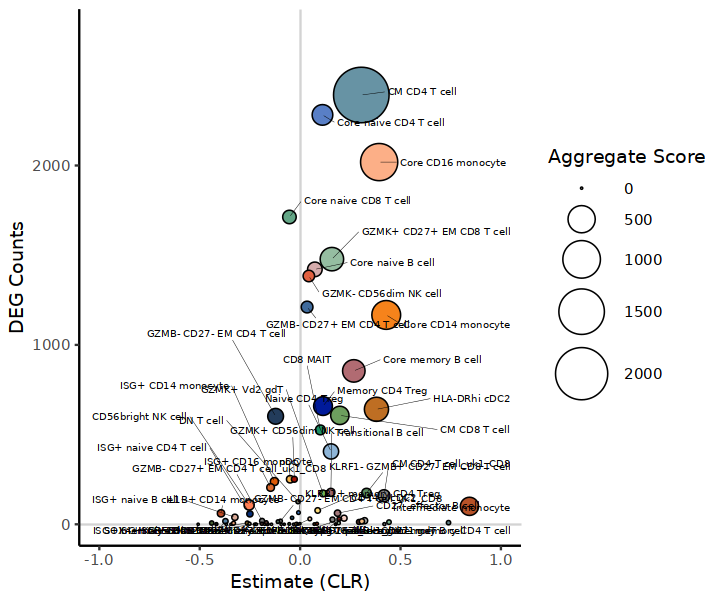

In [21]:
options(repr.plot.width = 6, repr.plot.height = 5)
cell_type_colors <- setNames(merged_df$color, merged_df$celltype)
p1 <- ggplot(merged_df, aes(x =estimate, y = Total_DEGs, size = adjP_degs_combined_value, fill = celltype)) +
  geom_hline(yintercept = 0, color = "lightgray", size = 0.5) + 
  geom_vline(xintercept = 0, color = "lightgray", size = 0.5) + 
  geom_point(shape = 21, colour = "black") +
  theme_classic() +
  scale_size_continuous(range = c(0.02, 15), limits = c(0, max(merged_df$adjP_degs_combined_value))) +
 
  xlab("Estimate (CLR)") +
  ylab("DEG Counts") +
  theme(legend.position = "right") +
  scale_fill_manual(values = cell_type_colors) +
  scale_x_continuous(limits = c(-1, 1)) +
  guides(fill = "none", size = guide_legend("Aggregate Score")) + 
  geom_text_repel(
    data = merged_df %>% filter(celltype %in% sig_L3),
    box.padding = 0.5,
    force = 0.5,
    max.overlaps = 50,
    min.segment.length = 0,
    nudge_x = 0.15,
    hjust = 0.1,
    segment.size = 0.1,
    mapping = aes(label = celltype),
    size = 2
  ) +
  theme(
    panel.grid.major = element_blank(),  # Remove major grid lines
    panel.grid.minor = element_blank()   # Remove minor grid lines
  )+
  scale_y_continuous(expand = expansion(mult = c(0.05, 0.2)))
p1

In [22]:
ggsave("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Fig_S2D_Xsec_bubbleplot_Estimate.pdf", plot = p1, width = 6, height = 5)

In [25]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ggrepel_0.9.5               plotly_4.10.4              
 [3] knitr_1.47                  ggpubr_0.6.0               
 [5] SeuratDisk_0.0.0.9021       SingleCellExperiment_1.22.0
 [7] SummarizedExperiment_1.30.2 Biobase_2.60.0             
 [9] GenomicRanges_1.52.1        Genome